
# Project: Investigate a Dataset - [No-Show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Data set Description 

#### This data set collect records from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. the aim of this analysis is to know what is the most important factors that may prevent patients to show up for their appointments, this can be used to predict the percentage of the no show patients in the future.

#### the following patients' variables may be the most important ones for this analysis
<ul>
<li> Scholarship </li>
<li> Age </li>
<li> Gender </li>
<li> Chronic illness (Hipertension, Diabetes) </li>
<li> Alcoholism </li>
<li> Handicap </li>
<li> Neighborhood </li>
<li> Appointment Day </li>
<li> SMS received </li>
</ul>    

### Question(s) for Analysis
<ul>
<li> What are the most important individual variables that may lead to no show?</li>
<li> What are the most potential 2 or 3 variables that Brazil health authority should consider more to predict no-show patients? </li>
</ul>

###### Here we adding the packages that will be used for this project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

> In this section we will upload the 'no show' data using 'noshowappointments-kagglev2-may-2016.csv' then examine the data set against any non value records, duplicates ect.


###### Reading the csv file that contain no show data 
###### Print data sampel 

In [2]:
ns_df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
ns_df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Data Cleaning
>#### In this section we will investigate the data set for missing record, duplicate records, number of unique value for each parameter and data type of each column
 

###### Check data shape to know number of rows and columns

In [3]:
ns_df.shape

(110527, 14)

###### Check data information

In [4]:
ns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>#### Finding: Dataset contain 110527 records (rows) and 14 columns, there is no missing data

###### Check for dublicated data

In [5]:
ns_df.duplicated().sum()

0

>#### Finding: There is no duplication is this data set 

###### Check number of unique values for each variable

In [6]:
ns_df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

>#### Finding: Total number of patients 62K have 110K visits at the given date/time in 81 different neighborhood areas

###### Investigate different handicap value

In [7]:
print(ns_df.Handcap.unique())

[0 1 2 3 4]


>#### Finding: There are 4 categories of handicap, but no details about it

###### Investigate different age value

In [8]:
print(ns_df.Age.unique())

[ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]


>#### Finding: There is one irrelevant age (-1) we can ignore it 

###### Deleting AppointmentID as there is no us for it

In [9]:
ns_df.drop(['AppointmentID'], axis = 1, inplace = True)
ns_df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


###### Change No-show column data type to be boolean, this will help more in analysis
###### To do so we will create new column with True and False value replacing 'Yes'& 'No'

In [10]:
ns_df['Nshow'] = ns_df['No-show'].map({'Yes': True, 'No': False})
ns_df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Nshow
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,False
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,False
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,False
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,False
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,False


###### Change 'ScheduledDay' and 'AppointmentDay'to be date & time instead of object so we can use it in our analysis when needed 
###### Check for data type after apply these changes

In [11]:
ns_df['AppointmentDay'] = pd.to_datetime(ns_df['AppointmentDay'])
ns_df['ScheduledDay'] = pd.to_datetime(ns_df['ScheduledDay'])

ns_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   Gender          110527 non-null  object             
 2   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 3   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 4   Age             110527 non-null  int64              
 5   Neighbourhood   110527 non-null  object             
 6   Scholarship     110527 non-null  int64              
 7   Hipertension    110527 non-null  int64              
 8   Diabetes        110527 non-null  int64              
 9   Alcoholism      110527 non-null  int64              
 10  Handcap         110527 non-null  int64              
 11  SMS_received    110527 non-null  int64              
 12  No-show         110527 non-null  object             
 13  Nshow         

<a id='eda'></a>
## Exploratory Data Analysis

>#### Here we will perform data analysis and visualization, that can help us answer the questions that we set in the introduction.
>First, we need to explain what doing such analysis may be important so we will assess the volume of no-show as percentage from total data, then well have a glance look about the key statistics before start tackling the questions answers.

###### First we will calculate the percentage of no-show patients in the given data set 
###### Create 2 variables one contain the show up patients, the second show no show patients
###### Use pie chart to present this outcome

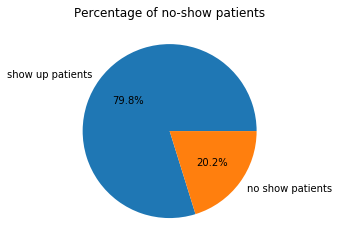

<Figure size 720x720 with 0 Axes>

In [12]:
show = (ns_df['Nshow']== False).sum()
no_show = (ns_df['Nshow']== True).sum()
value = [show, no_show]
label = ('show up patients','no show patients ')

plt.pie(value, labels = label, autopct= '%.1f%%')
plt.title('Percentage of no-show patients')
plt.figure(figsize=(10,10))
plt.show()


>#### Finding: The no-show percentage is 20%, this may cause burden to the health care system, analyzing the given data to find potential causes of no-shows, may help the health authorities in Brazil to predict those who will not show up for their appointment so they can either schedule more appointments to help more patients or reduce the medical staff manpower to trim unneeded cost.

###### Get key statestis of the data set

In [13]:
ns_df.describe()

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>#### Finding: As quick look for the above statistics seems that variables like, Age, Scholarship, Hypertension and SMS_received may have co-relation with no-shows records, this will be confirmed in the next sections of the report.

### Research Question 1 (What are the most important individual variables that may lead to no show?)

>#### To answer this question we will examine the individual variables, one by one and see how this variable may affect the no-show record, in case we find potential co-relation we may go for more analysis.

###### Creat function that will take the variable name, then group data by the selected variable and patentId, count the records, The function also received the plot kind, draw the outcome graph as per plot kind and print it.

In [14]:
def plotting(a,b):
    ns_df.groupby([a])['PatientId'].count().plot(kind = b)
    plt.title(("Patients per " + a))
    plt.xlabel(a)
    plt.ylabel('Number of Patients')
    c = ns_df.groupby([a])['PatientId'].count()
    print(c)

###### Check Scholarship data as individual variable 

Scholarship
0    99666
1    10861
Name: PatientId, dtype: int64


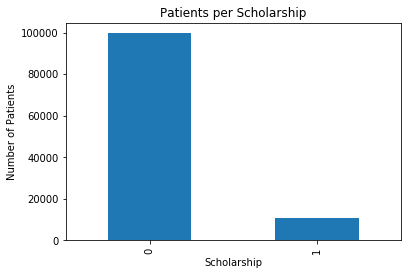

In [15]:
plotting('Scholarship','bar')


###### Check Percentage of patients with scholarship from total number of patients

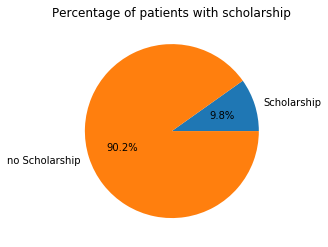

<Figure size 720x720 with 0 Axes>

In [16]:
scho = (ns_df['Scholarship'] == True).sum()
no_scho = (ns_df['Scholarship'] == False).sum()
value = [scho, no_scho]
label = ('Scholarship','no Scholarship')

plt.pie(value, labels = label, autopct= '%.1f%%')
plt.title('Percentage of patients with scholarship')
plt.figure(figsize=(10,10))
plt.show()


>#### Finding: The majority of patients (90%) have no scholarship, they pay for a consultation from their pocket, about 10% of total patients have a scholarship, the co-relation between scholarship and no-show is questionable we will investigate it more in answering 2nd question.

###### Check Age data as individual variable

Age
-1         1
 0      3539
 1      2273
 2      1618
 3      1513
        ... 
 98        6
 99        1
 100       4
 102       2
 115       5
Name: PatientId, Length: 104, dtype: int64


count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

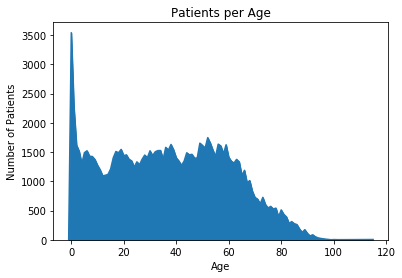

In [17]:
plotting('Age','area')
ns_df.describe().Age

>#### Finding: The Age histogram is left skewed, the mean age for patients is 34.3, 25% of them are between 51 and 102 years, there is age outlier at 115 year,need to examin potintial co-relation between Age and no-show patients in the coming sections

###### Check Gender data as individual variable

Gender
F    71840
M    38687
Name: PatientId, dtype: int64


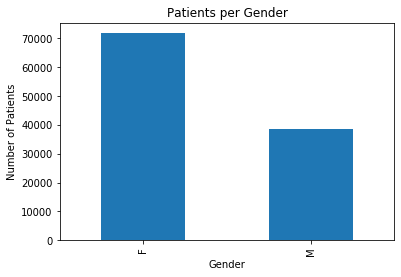

In [18]:
plotting('Gender','bar')

###### Draw pie chart to see the percentage of male and female patients

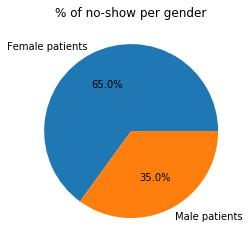

In [19]:
Male = (ns_df['Gender']== 'M').sum()
Female = (ns_df['Gender']== 'F').sum()
value = [Female, Male]
label = ('Female patients','Male patients ')

plt.pie(value, labels = label, autopct= '%.1f%%')
plt.title('% of no-show per gender')


plt.show()

>#### Finding: more than two third of patients are female, need to examin potintial co-relation between Gender and no-show patients in the coming sections

###### Check Alcoholism data as individual variable

Alcoholism
0    107167
1      3360
Name: PatientId, dtype: int64


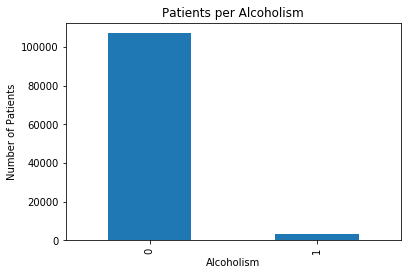

In [20]:
plotting('Alcoholism','bar')

>#### Finding: Most of patients are not alcohol addict, so Alcoholism amy be not important for our analysis

###### Check Hypertension data as individual variable

Hipertension
0    88726
1    21801
Name: PatientId, dtype: int64


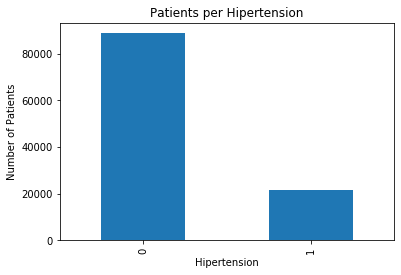

In [21]:
plotting('Hipertension','bar')

>#### Finding: Almost 25% of patients are hypertensive, need to examin potintial co-relation between hypertension and no-show patients in the coming sections

###### Check Diabetes data as individual variable

Diabetes
0    102584
1      7943
Name: PatientId, dtype: int64


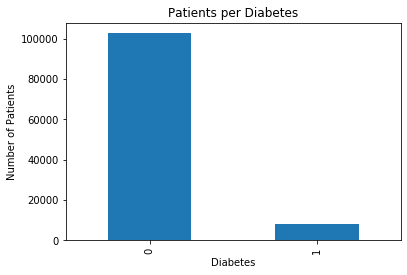

In [22]:
plotting('Diabetes','bar')

>#### Finding: Most of patients are not diabetics, so diabetes as individual variable amy be not important for our analysis

###### Check Handicap data as individual variable

Handcap
0    108286
1      2042
2       183
3        13
4         3
Name: PatientId, dtype: int64


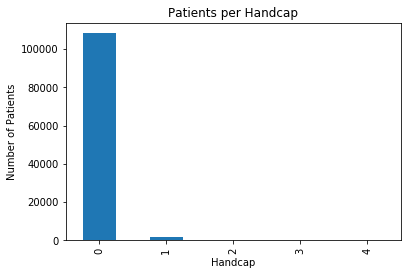

In [23]:
plotting('Handcap','bar')

>#### Finding: Most of patients are not handicaped, so handicap as individual variable amy be not important for our analysis

###### Check SMS received data as individual variable

SMS_received
0    75045
1    35482
Name: PatientId, dtype: int64


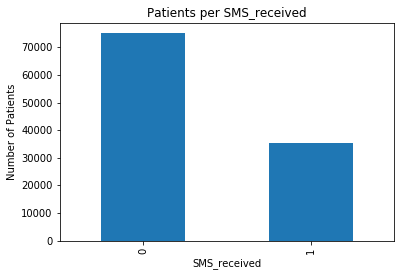

In [24]:
plotting('SMS_received', 'bar')

###### Check Percentage of patients received SMS from total number of patients

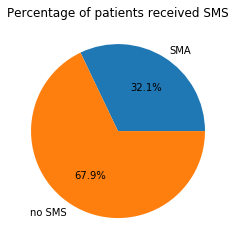

<Figure size 720x720 with 0 Axes>

In [25]:
sms = (ns_df['SMS_received'] == True).sum()
no_sms = (ns_df['SMS_received'] == False).sum()
value = [sms, no_sms]
label = ('SMA','no SMS')

plt.pie(value, labels = label, autopct= '%.1f%%')
plt.title('Percentage of patients received SMS')
plt.figure(figsize=(10,10))
plt.show()

>#### Finding: More than one third of patients received SMS, need to examin if there is co-relation btween SMS received and no-shows data in the coming section

###### Check Appointment day data as individual variable

AppointmentDay
2016-04-29 00:00:00+00:00    3235
2016-05-02 00:00:00+00:00    4376
2016-05-03 00:00:00+00:00    4256
2016-05-04 00:00:00+00:00    4168
2016-05-05 00:00:00+00:00    4273
2016-05-06 00:00:00+00:00    3879
2016-05-09 00:00:00+00:00    4520
2016-05-10 00:00:00+00:00    4308
2016-05-11 00:00:00+00:00    4474
2016-05-12 00:00:00+00:00    4394
2016-05-13 00:00:00+00:00    3987
2016-05-14 00:00:00+00:00      39
2016-05-16 00:00:00+00:00    4613
2016-05-17 00:00:00+00:00    4372
2016-05-18 00:00:00+00:00    4373
2016-05-19 00:00:00+00:00    4270
2016-05-20 00:00:00+00:00    3828
2016-05-24 00:00:00+00:00    4009
2016-05-25 00:00:00+00:00    3909
2016-05-30 00:00:00+00:00    4514
2016-05-31 00:00:00+00:00    4279
2016-06-01 00:00:00+00:00    4464
2016-06-02 00:00:00+00:00    4310
2016-06-03 00:00:00+00:00    4090
2016-06-06 00:00:00+00:00    4692
2016-06-07 00:00:00+00:00    4416
2016-06-08 00:00:00+00:00    4479
Name: PatientId, dtype: int64


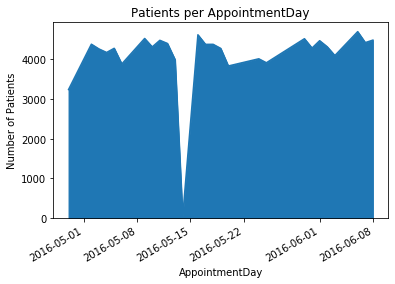

In [26]:
plotting('AppointmentDay','area')

###### Check appointment weekday and number of patients
###### Creat new clolumn for day_of_week then plot it 

day_of_week
Friday       19019
Monday       22715
Saturday        39
Thursday     17247
Tuesday      25640
Wednesday    25867
Name: PatientId, dtype: int64


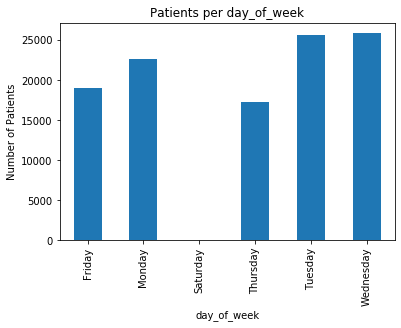

In [27]:
ns_df['day_of_week'] = ns_df['AppointmentDay'].dt.day_name()
plotting('day_of_week','bar')

>#### Finding: Almost most there is no appointments on weekends, while there are small variations for number of patients during weekdays 

>#### ------------------------------------------------------------------------------------------------
>#### As per the above analysis, I believe that the following variables may have potential co-relation with the number of no-shows, so this will be examined in the following section.
> <ul>
    <li>Scholarship</li>
    <li>Age</li>
    <li>Gender</li>
    <li>Hypertension</li>
    <li>SMS Received</li>
    </ul>    
>___________________________________________________________________________________

### Research Question 2 (What are the most potential 2 or 3 variables that Brazil health authority should consider more to predict no-show patients?)

>#### To get the answer to this question we will examine the co-relation of variables that we conclude in the first question and the number of no-shows patients, Scholarship, Age, Gender, Hypertension & SMS Received, we do this through histogram of these variables vs. mask of show & no-show, also through box plotting of these variables vs. show and no-show when posible
 

###### Create function histplt that create a musk of show & no-show, receive variable from userm draw histogram of show and no-show data for the selected variable 

In [30]:
def hisplt(a):
    show = ns_df['Nshow'] == False
    nshow = ns_df['Nshow'] == True
    ns_df[a][show].hist(label = 'Show up')
    ns_df[a][nshow].hist(label = 'No show')
    plt.title('Show/No-show per ' + a)
    plt.xlabel(a)
    plt.ylabel('Number of Patiens')
    plt.legend()
    plt.show()

###### Create function boxplt create data grouped by selecting variables (a) vs. Nshow data, also it calculates the mean and stander deviation of the selected variable vs. show and no-show records 

In [31]:
def boxplt(a):
    ns_df.boxplot(column = [a], by = ['Nshow'], rot = 90)
    plt.ylabel(a)
    plt.xlabel('Show/No Show')
    c = pd.DataFrame(ns_df.groupby(['Nshow'])[a].describe().loc[:,['mean','std']])
    print(c)

#### 1- Scholarshp

######  Examin the co-relation between Scholarship and no-show

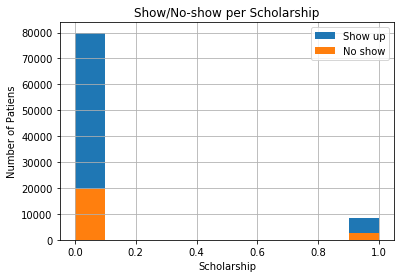

In [33]:
hisplt('Scholarship')

###### Box plotting Scholarship vs. show and no show, calculate mean & stander deviation

           mean       std
Nshow                    
False  0.093903  0.291695
True   0.115507  0.319640


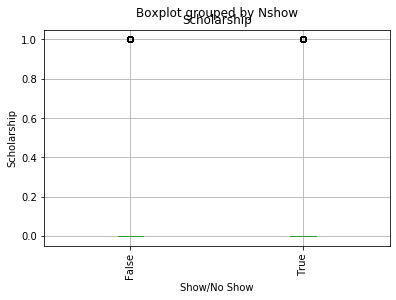

In [31]:
boxplt('Scholarship')

>#### Finding: There is a slight increase for the no show in patient with scholarship, however the stander division and the graphs show that co-relation between scholarship and no-show may be  weak or null 

#### 2- Age

######  Examin the co-relation between Age and no-show

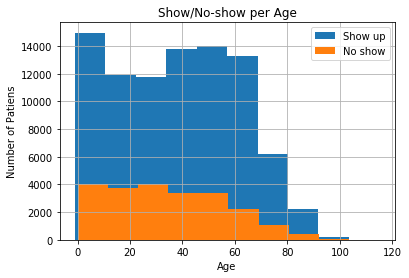

In [34]:
hisplt('Age')

###### Box plotting Age vs. show and no show, calculate mean & stander deviation

            mean        std
Nshow                      
False  37.790064  23.338878
True   34.317667  21.965941


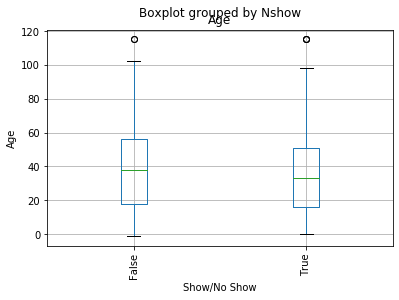

In [33]:
boxplt('Age')

>#### Finding: The histogram show that the number of nos how slightly decreased in high age group, however the mean age of show and no-show is 37.7 & 34.3 years that for me not significant, in conclusion that co-relation between Age and no-show may be weak

#### 3- Gender

######  Examin the co-relation between Gender and no-show

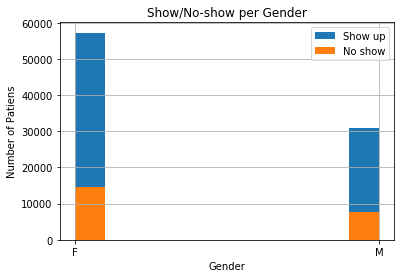

In [35]:
hisplt('Gender')

###### Plotting show and no-show per Gender

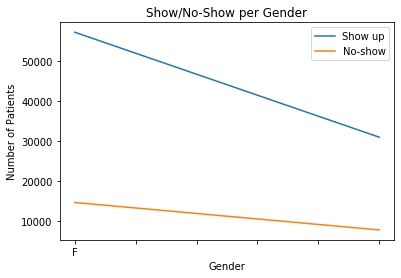

In [35]:
ns_df.Gender[show].value_counts().plot(label ='Show up')
ns_df.Gender[nshow].value_counts().plot(label ='No-show')
plt.title('Show/No-Show per Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.legend()
plt.show()

>#### Finding: Both histogram and plot graph show that there is a higher number of female than male in the entire data also female population may associated with a higher no-show number compared to mail, in conclusion a co-relation between Gender and no-show may be there.

#### 4- Hypertension

######  Examin the co-relation between Hypertension and no-show

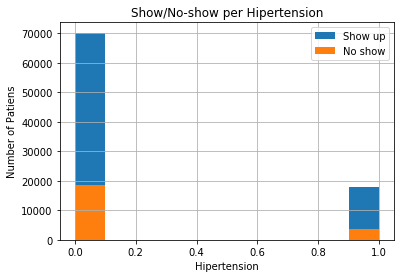

In [36]:
hisplt('Hipertension')

###### Box plotting hypertension vs. show and no show, calculate mean & stander deviation

           mean       std
Nshow                    
False  0.204392  0.403259
True   0.169004  0.374764


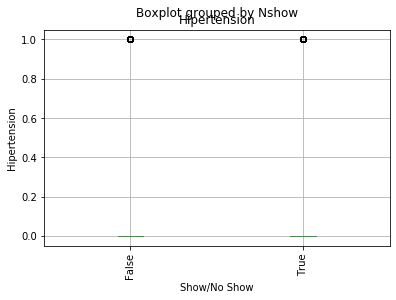

In [37]:
boxplt('Hipertension')

###### Plotting show and no-show per Hypertension

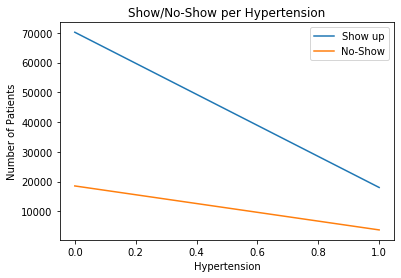

In [38]:
ns_df.Hipertension[show].value_counts().plot(label ='Show up')
ns_df.Hipertension[nshow].value_counts().plot(label ='No-Show')
plt.title('Show/No-Show per Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Number of Patients')
plt.legend()
plt.show()

>#### Finding: Hypertensive patients relatively have a low no-show number compared to patients with no hypertension, it is shown in the histogram and plot graph, so maybe there is a co-relation between hypertension and no-show.

#### 5- SMS received

######  Examin the co-relation between SMS received and no-show

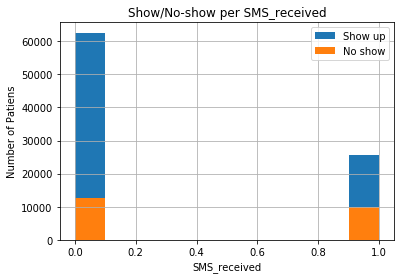

In [37]:
hisplt('SMS_received')

###### Box plotting SMSreceived vs. show and no show, calculate mean & stander deviation

           mean       std
Nshow                    
False  0.291334  0.454380
True   0.438371  0.496198


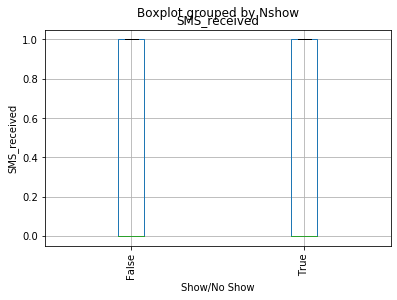

In [40]:
boxplt('SMS_received')

###### Plotting show and no-show per SMS_received

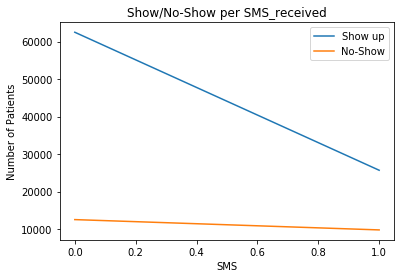

In [41]:

ns_df.SMS_received[show].value_counts().plot(label ='Show up')
ns_df.SMS_received[nshow].value_counts().plot(label ='No-Show')
plt.title('Show/No-Show per SMS_received')
plt.xlabel('SMS')
plt.ylabel('Number of Patients')
plt.legend()
plt.show()

>#### Finding: There is no clear co-relation between receiving SMS and show or no show records, may be there is weak co-relation between these two variables 

### Gender and Hypertension 

###### Here we will test the effect of Gender + Hypertension to the no-show records

In [42]:
ns_df.groupby(['Gender', 'Hipertension']).Nshow.mean()

Gender  Hipertension
F       0               0.211271
        1               0.173219
M       0               0.205120
        1               0.172547
Name: Nshow, dtype: float64

###### Plotting the effect of Gender + Hypertension to the no-show records

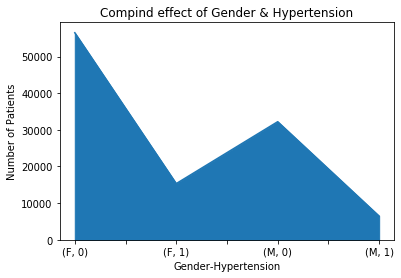

In [43]:
ns_df.groupby(['Gender', 'Hipertension']).Nshow.count().plot(kind='area')
plt.title('Compind effect of Gender & Hypertension')
plt.xlabel('Gender-Hypertension')
plt.ylabel('Number of Patients')
plt.show()

>#### Finding: Both mean values and the above plot graph show that the combination between gender and hypertension may have co-relation to no-show data

<a id='conclusions'></a>
## Conclusions

> This data set collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

> We test the data and find no-show appointments represents 20% of total appointments in the given period, this may cause a burden to the health care system. 

> The aim of analyzing the given data is to find potential causes of no-shows, this may help the health authorities in Brazil to predict those who will not show up for their appointment so they can either schedule more appointments to help more patients or reduce the medical staff manpower to trim unneeded cost.

> After analysing the individual variables we came out with 5 variables that may affect the no-show records (Scholarship, Age, Gender, Hypertension & SMS Received).

> Went through more detailed analysis for each of these varied and it's potential co-relation with no-show record and we came out with 2 main potential ones (Gender & Hypertension).

> We get extra confidence by examining both variables together and we find that our finding may be helpful.

> We believe female patient suffering from hypertension may represent a higher risk group as per the given data.



### Limitations
> The given data WA almost clean, there was no duplicate or null value records.

> Have to change the appointment/scheduled day to be the date, time instead of the object also we get the weekday name out of it to see if there is a potential co-relation between the appointment day and no-show.

> The given data is for almost 100k record for only one month, I believe that this is maybe not enough to be reflected on population, getting data of more months/years can increase our confidence of the outcome and finding of this analysis.

> We did not use and statistical test to validate the analysis, this can improve the confidence of our findings.